In [2]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime

plt.style.use('fivethirtyeight')


In [3]:
pip install python-binance


Note: you may need to restart the kernel to use updated packages.


In [4]:
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


client = Client()


candles = client.get_historical_klines(
    "ETHUSDT",
    Client.KLINE_INTERVAL_1DAY,
    "1000 days ago UTC"
)


stock_data = pd.DataFrame(candles, columns=[
    'timestamp', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'num_trades',
    'taker_buy_base_vol', 'taker_buy_quote_vol', 'ignore'
])


stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'], unit='ms')
stock_data[['open', 'high', 'low', 'close', 'volume']] = stock_data[['open', 'high', 'low', 'close', 'volume']].astype(float)



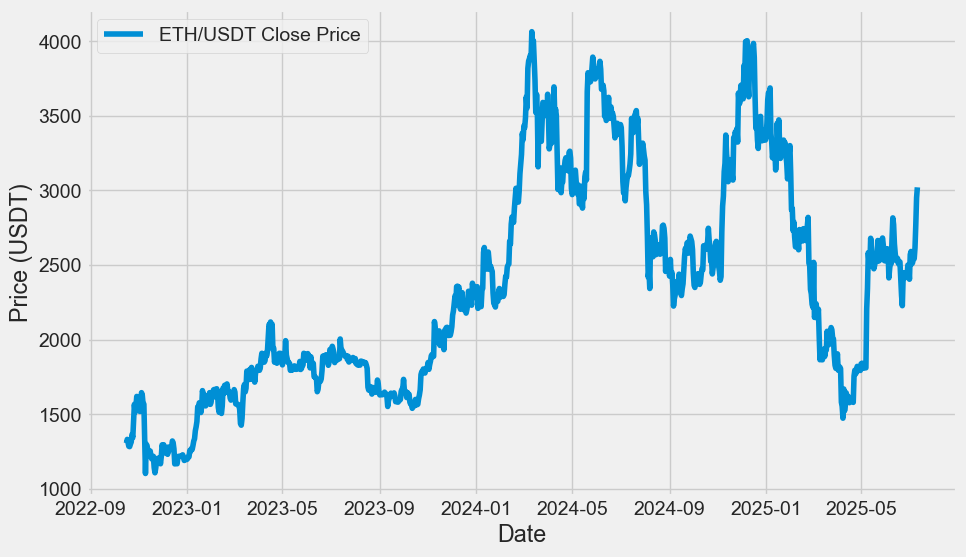

In [5]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.plot(stock_data['timestamp'], stock_data['close'], label='ETH/USDT Close Price')
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.show()


In [6]:
stock_data.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_buy_base_vol,taker_buy_quote_vol,ignore
0,2022-10-16,1274.93,1315.35,1274.67,1305.95,293321.3632,1665964799999,379290237.63945800,397092,149695.15230000,193561709.41425100,0
1,2022-10-17,1305.96,1338.57,1295.64,1331.40,459848.4941,1666051199999,606979972.11902400,553275,230951.51060000,304878458.69521700,0
2,2022-10-18,1331.39,1341.73,1286.72,1310.71,572728.9189,1666137599999,755297911.29191000,603600,277789.79160000,366388382.88029700,0
3,2022-10-19,1310.71,1313.50,1280.31,1285.09,368637.5105,1666223999999,478516630.18702300,472022,180735.50010000,234645769.59913900,0
4,2022-10-20,1285.09,1310.87,1270.36,1282.57,428531.6103,1666310399999,552593958.21273500,558080,209367.63060000,270050670.66826200,0


In [7]:
stock_data.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_buy_base_vol,taker_buy_quote_vol,ignore
995,2025-07-07,2570.35,2590.57,2512.00,2542.29,315707.5272,1751932799999,805370144.47348500,1985043,155551.56780000,396828929.46014500,0
996,2025-07-08,2542.30,2628.21,2523.59,2615.25,370915.7321,1752019199999,957180096.78372700,1899797,193484.74210000,499495444.93014900,0
997,2025-07-09,2615.25,2795.74,2589.78,2768.74,686119.3772,1752105599999,1844561572.90659900,2997546,357355.99720000,961263657.53783400,0
998,2025-07-10,2768.74,3000.00,2755.50,2951.29,951896.0700,1752191999999,2707997922.26563800,4235042,489489.59430000,1391543272.39458800,0
999,2025-07-11,2951.29,3029.55,2913.75,3021.24,254822.7069,1752278399999,757616957.11629100,1318724,133616.04310000,397475942.14416100,0


In [8]:
stock_data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,1000,2024-02-27 12:00:00,2022-10-16 00:00:00,2023-06-22 18:00:00,2024-02-27 12:00:00,2024-11-03 06:00:00,2025-07-11 00:00:00,NaN
open,1000.0,2337.00879,1102.73,1752.4575,2240.185,2914.9,4064.8,739.455498
high,1000.0,2393.06812,1146.13,1802.365,2308.98,2994.45,4107.8,760.113534
low,1000.0,2277.87642,1073.53,1716.515,2183.655,2853.2325,3968.0,714.446412
close,1000.0,2338.75416,1102.73,1755.385,2241.185,2924.0025,4064.8,739.005832
volume,1000.0,443754.442302,58519.6229,252189.0262,369858.7597,547901.727125,2807979.021,298054.869016
close_time,1000.0,1709121599999.0,1665964799999.0,1687543199999.0,1709121599999.0,1730699999999.0,1752278399999.0,24953999278.67276
num_trades,1000.0,1611258.237,154110.0,556156.25,933615.5,2114238.75,10550628.0,1636338.510485


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            1000 non-null   datetime64[ns]
 1   open                 1000 non-null   float64       
 2   high                 1000 non-null   float64       
 3   low                  1000 non-null   float64       
 4   close                1000 non-null   float64       
 5   volume               1000 non-null   float64       
 6   close_time           1000 non-null   int64         
 7   quote_asset_volume   1000 non-null   object        
 8   num_trades           1000 non-null   int64         
 9   taker_buy_base_vol   1000 non-null   object        
 10  taker_buy_quote_vol  1000 non-null   object        
 11  ignore               1000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 93.9+ KB


In [10]:
stock_data.shape

(1000, 12)

In [11]:
closing_price = stock_data[['close','timestamp']]

In [12]:
closing_price

,close,timestamp
0,1305.95,2022-10-16
1,1331.40,2022-10-17
2,1310.71,2022-10-18
3,1285.09,2022-10-19
4,1282.57,2022-10-20
...,...,...
995,2542.29,2025-07-07
996,2615.25,2025-07-08
997,2768.74,2025-07-09
998,2951.29,2025-07-10


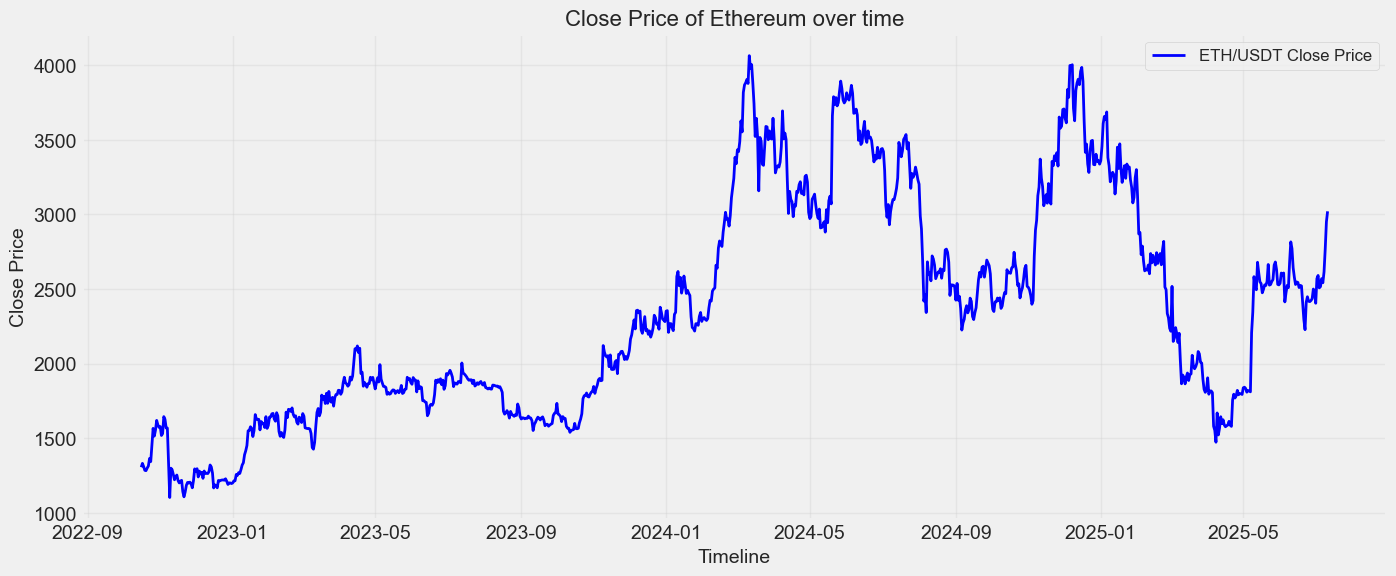

In [13]:
plt.figure(figsize=(15,6))
plt.plot(stock_data['timestamp'], stock_data['close'], label='ETH/USDT Close Price', color='blue', linewidth=2)
plt.title("Close Price of Ethereum over time",fontsize = 16)
plt.xlabel("Timeline",fontsize = 14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [14]:
print(len(stock_data))

1000


In [15]:
print(stock_data.index)
print(stock_data.head())
print(stock_data.index.dtype)


RangeIndex(start=0, stop=1000, step=1)
   timestamp     open     high      low    close       volume     close_time  \
0 2022-10-16  1274.93  1315.35  1274.67  1305.95  293321.3632  1665964799999   
1 2022-10-17  1305.96  1338.57  1295.64  1331.40  459848.4941  1666051199999   
2 2022-10-18  1331.39  1341.73  1286.72  1310.71  572728.9189  1666137599999   
3 2022-10-19  1310.71  1313.50  1280.31  1285.09  368637.5105  1666223999999   
4 2022-10-20  1285.09  1310.87  1270.36  1282.57  428531.6103  1666310399999   

   quote_asset_volume  num_trades taker_buy_base_vol taker_buy_quote_vol  \
0  379290237.63945800      397092    149695.15230000  193561709.41425100   
1  606979972.11902400      553275    230951.51060000  304878458.69521700   
2  755297911.29191000      603600    277789.79160000  366388382.88029700   
3  478516630.18702300      472022    180735.50010000  234645769.59913900   
4  552593958.21273500      558080    209367.63060000  270050670.66826200   

  ignore  
0      0  
1

In [16]:
stock_data.index = pd.to_datetime(stock_data.index, unit='ms')  # or unit='s' depending on Binance data


In [17]:
stock_data['timestamp'] = pd.to_datetime(stock_data['timestamp'])
stock_data.set_index('timestamp', inplace=True)


In [18]:



for i in range(2022, 2026):  
    count = (stock_data.index.year == i).sum()
    print(f"{i}: {count} days")

2022: 77 days
2023: 365 days
2024: 366 days
2025: 192 days


In [19]:
stock_data['MA_365']=stock_data['close'].rolling(window=365).mean()
stock_data['MA_200']=stock_data['close'].rolling(window=200).mean()
stock_data['MA_100']=stock_data['close'].rolling(window=100).mean()

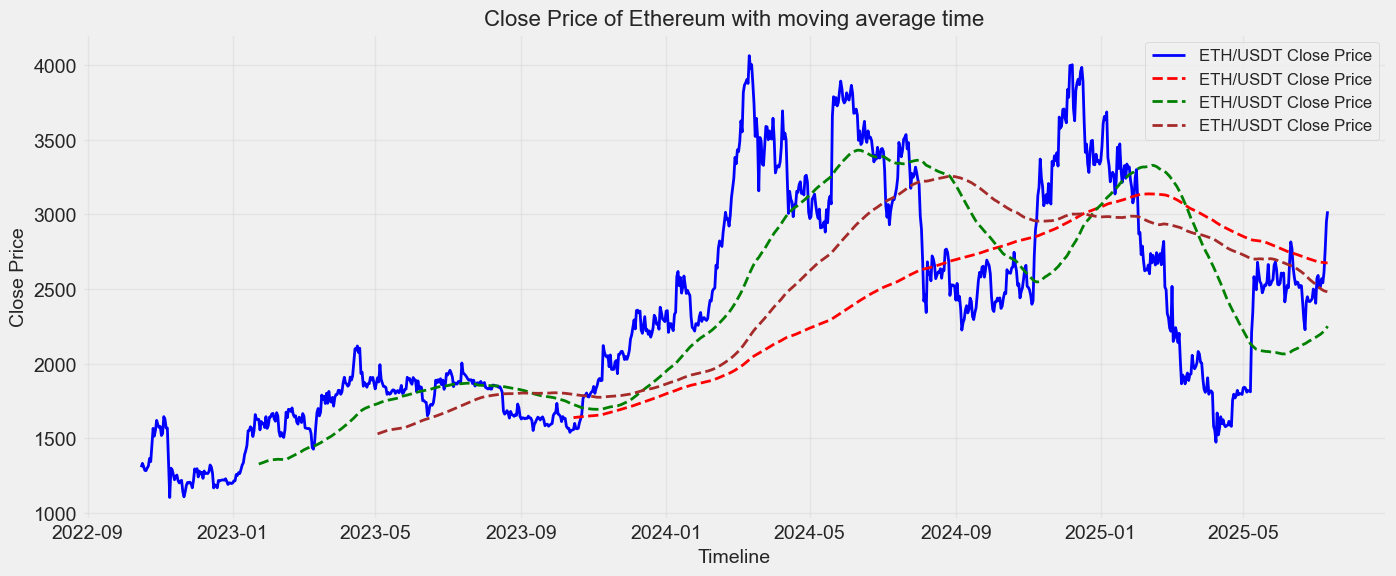

In [20]:
plt.figure(figsize=(15,6))
plt.plot(stock_data.index, stock_data['close'], label='ETH/USDT Close Price', color='blue', linewidth=2)
plt.plot(stock_data.index, stock_data['MA_365'], label='ETH/USDT Close Price', color='red', linestyle="--",linewidth=2)
plt.plot(stock_data.index, stock_data['MA_100'], label='ETH/USDT Close Price', color='green',linestyle="--", linewidth=2)
plt.plot(stock_data.index, stock_data['MA_200'], label='ETH/USDT Close Price', color='brown', linestyle="--",linewidth=2)
plt.title("Close Price of Ethereum with moving average time",fontsize = 16)
plt.xlabel("Timeline",fontsize = 14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

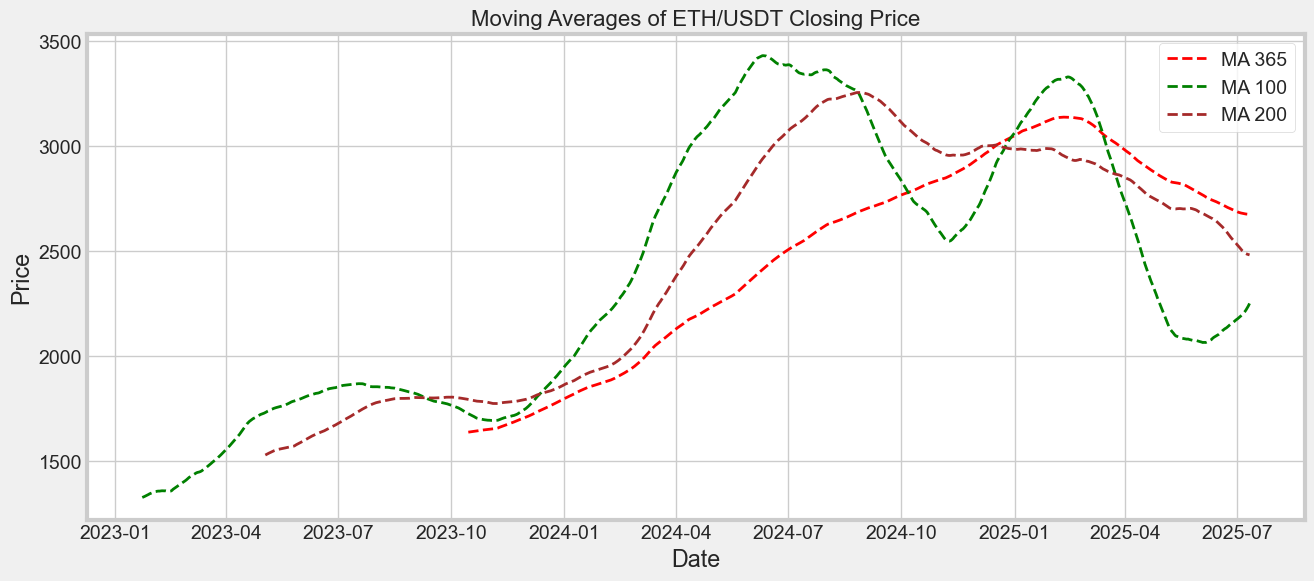

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

sns.lineplot(x=stock_data.index, y=stock_data['MA_365'], label='MA 365', color='red', linestyle="--", linewidth=2)
sns.lineplot(x=stock_data.index, y=stock_data['MA_100'], label='MA 100', color='green', linestyle="--", linewidth=2)
sns.lineplot(x=stock_data.index, y=stock_data['MA_200'], label='MA 200', color='brown', linestyle="--", linewidth=2)

plt.title('Moving Averages of ETH/USDT Closing Price', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
import seaborn as sns 
import plotly as ply


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['close']].dropna())

In [24]:
scaled_data

array([[0.06860743],
       [0.07719939],
       [0.07021441],
       [0.06156505],
       [0.0607143 ],
       [0.0665143 ],
       [0.07119346],
       [0.08827273],
       [0.08132151],
       [0.1205272 ],
       [0.15643452],
       [0.13886235],
       [0.15248796],
       [0.17447933],
       [0.16465175],
       [0.15865932],
       [0.16061403],
       [0.14031066],
       [0.14458808],
       [0.18299703],
       [0.17698771],
       [0.15717387],
       [0.15710972],
       [0.07833711],
       [0.        ],
       [0.06635562],
       [0.06297961],
       [0.05216622],
       [0.04009358],
       [0.04744993],
       [0.05080906],
       [0.03829754],
       [0.03298369],
       [0.03708555],
       [0.03880394],
       [0.01332852],
       [0.00155634],
       [0.01244738],
       [0.02761245],
       [0.03409778],
       [0.0326022 ],
       [0.03472909],
       [0.0307724 ],
       [0.02195762],
       [0.03840557],
       [0.06472838],
       [0.05863467],
       [0.065

In [25]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [26]:
# Prepare data for LSTM 
x_data = []
y_data = []
base_days = 100
for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [27]:
train_size = int(len(x_data)*0.9)
x_train , y_train = x_data[:train_size],y_data[:train_size]
x_test , y_test = x_data[train_size:],y_data[train_size:]

In [28]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(x_train,y_train,batch_size=5,epochs=10)

Epoch 1/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0211
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0032
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0026
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0025
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0024
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0023
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0013
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0011
Epoch 9/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0012
Epoch 10/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0014


In [30]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [31]:
inv_predictions

array([[1627.7789],
       [1629.3287],
       [1633.7726],
       [1616.926 ],
       [1597.9066],
       [1590.9326],
       [1592.3206],
       [1607.0841],
       [1604.2412],
       [1595.7751],
       [1678.5642],
       [1756.3844],
       [1777.4479],
       [1782.2867],
       [1799.1877],
       [1792.6786],
       [1791.0138],
       [1791.1691],
       [1790.8755],
       [1815.9409],
       [1834.8114],
       [1837.9929],
       [1823.4513],
       [1820.2601],
       [1819.3816],
       [1816.8254],
       [2036.5303],
       [2257.3547],
       [2493.6978],
       [2519.0195],
       [2467.6497],
       [2563.9766],
       [2565.2202],
       [2515.4067],
       [2493.6958],
       [2456.0024],
       [2466.1658],
       [2501.8745],
       [2516.4749],
       [2536.8752],
       [2621.9727],
       [2554.1472],
       [2516.0415],
       [2522.4243],
       [2540.2783],
       [2616.8665],
       [2660.8777],
       [2629.7708],
       [2538.1694],
       [2504.0125],


In [32]:
plotting_data = pd.DataFrame({
                'Original': inv_y_test.flatten(),
                'Prediction': inv_predictions.flatten(),
                             },index = stock_data.index[train_size + base_days:]
                            )
    
    

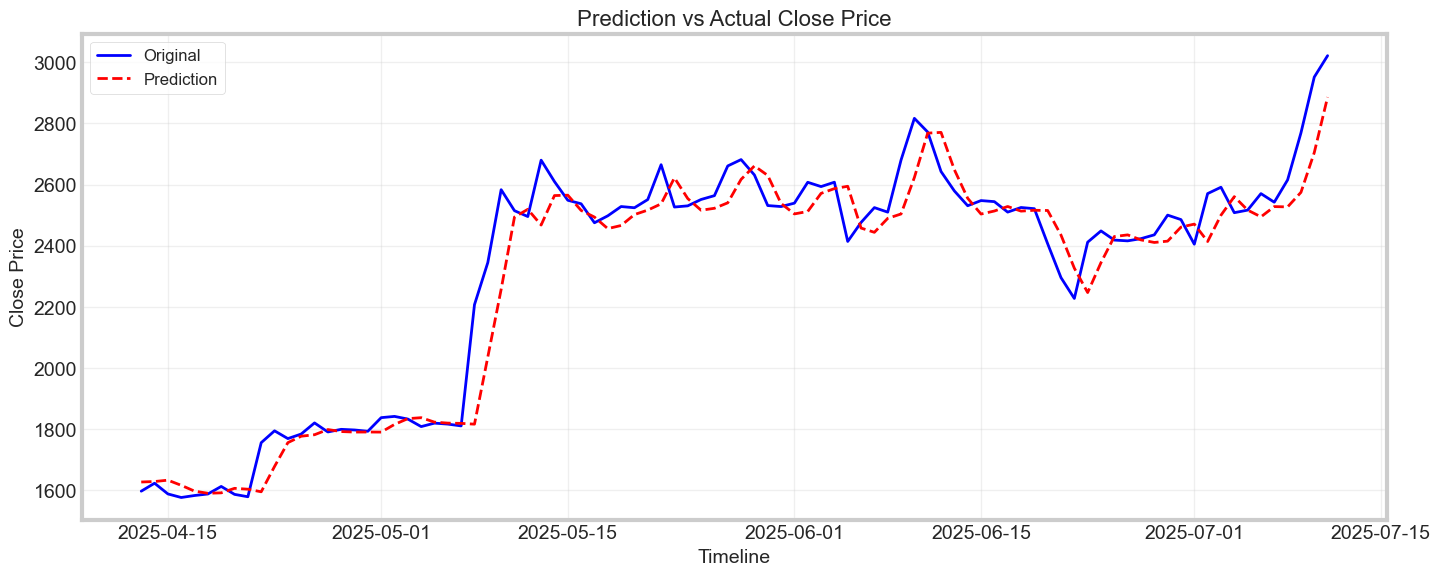

In [33]:
plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='Prediction', color='red', linestyle="--",linewidth=2)

plt.title("Prediction vs Actual Close Price",fontsize = 16)
plt.xlabel("Timeline",fontsize = 14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize = 12)
plt.show()

In [34]:
last_100 = scaled_data[-100:].reshape(1,-1,1)
future_predictions=[]
for x in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:,1:,:], next_days.reshape(1,1,-1),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [35]:
future_predictions

[array([[2985.7651]], dtype=float32),
 array([[2957.2773]], dtype=float32),
 array([[2905.2222]], dtype=float32),
 array([[2851.2686]], dtype=float32),
 array([[2804.9246]], dtype=float32),
 array([[2769.7534]], dtype=float32),
 array([[2745.2869]], dtype=float32),
 array([[2728.9905]], dtype=float32),
 array([[2717.7427]], dtype=float32),
 array([[2708.7324]], dtype=float32)]

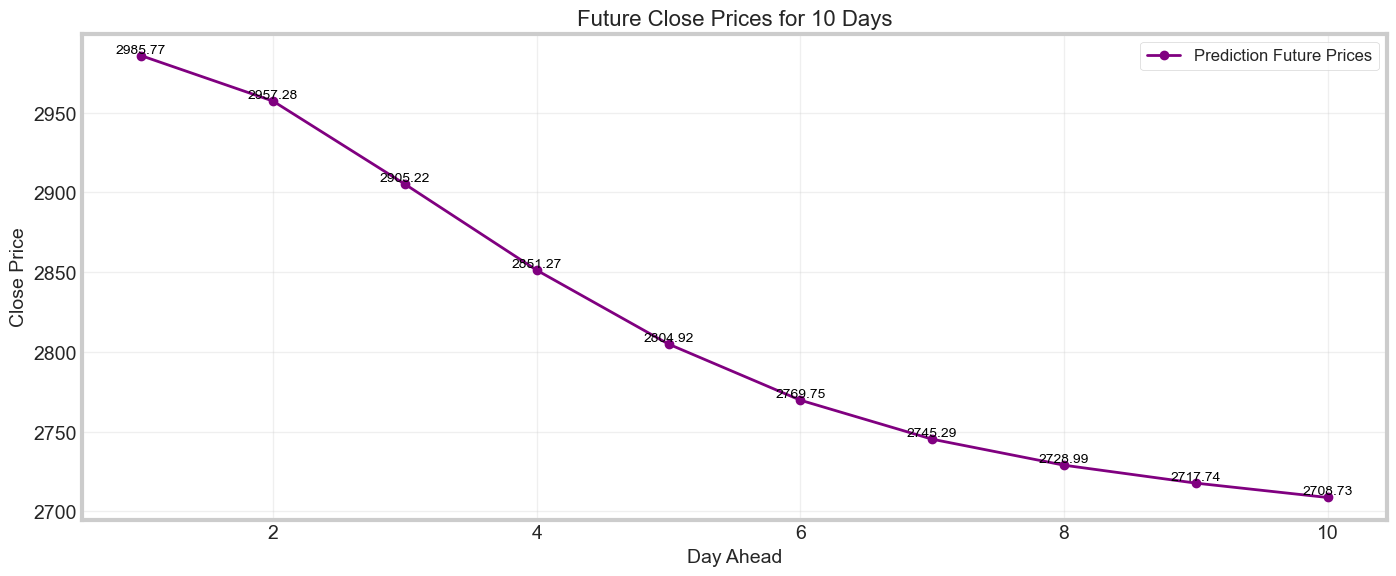

In [36]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [37]:
model.save("model.keras")